# **Section 1 – Dataset Overview**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/StudentsPerformance.csv')

In [2]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# **Section 2 – Overall Performance**

**Step 1 — Calculate Overall Averages**

In [5]:
overall_math = df['math score'].mean()
overall_reading = df['reading score'].mean()
overall_writing = df['writing score'].mean()
overall_combined = (overall_math + overall_reading + overall_writing ) / 3

print(f"Overall Performance:")
print(f"------------------------------")
print(f" Math Score: {overall_math}")
print(f" Reading Score: {overall_reading}")
print(f" Writing Score: {overall_writing}")
print(f" Combined Average: {overall_combined:.2f}")


Overall Performance:
------------------------------
 Math Score: 66.089
 Reading Score: 69.169
 Writing Score: 68.054
 Combined Average: 67.77


**Step 2 — Distribution**

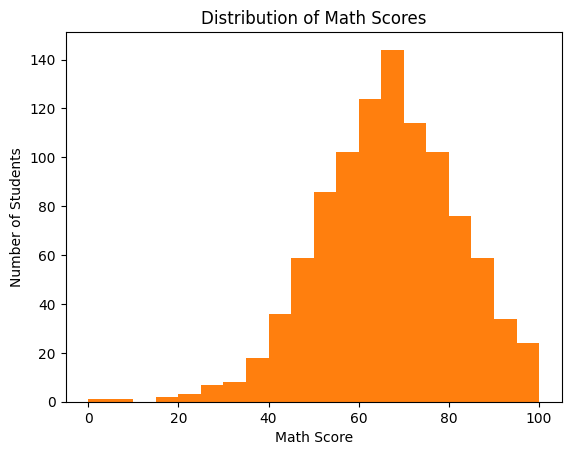

In [ ]:
plt.hist(df["math score"], bins=20)

plt.title("Distribution of Math Scores")
plt.xlabel("Math Score")
plt.ylabel("Number of Students")

plt.show()



The distribution of math scores shows that most students score between 60 and 75, indicating that performance is concentrated in the mid-to-high range. While there are students scoring both very low and very high, the majority cluster around the average, suggesting moderate variation in performance rather than extreme dispersion.

# **Section 3 — Gender Analysis**

Step 1 — Compute Gender-Based Averages

In [ ]:
gender_avg = df.groupby("gender")[["math score", "reading score", "writing score"]].mean()

print("AVERAGE SCORES BY GENDER")
print("------------------------")
print(gender_avg)


AVERAGE SCORES BY GENDER
------------------------
        math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203


Step 2 — Create Comparison Chart

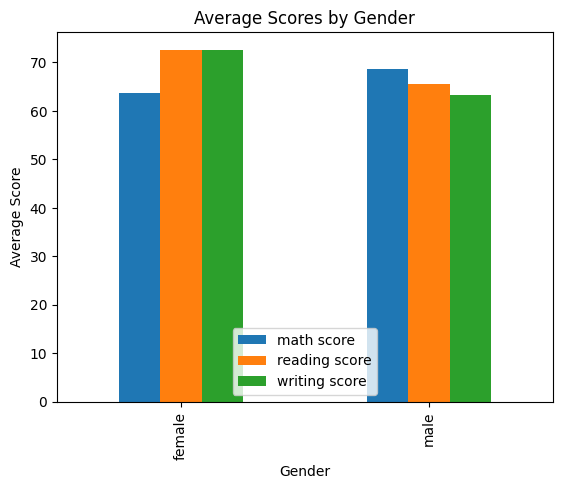

In [ ]:
gender_avg.plot(kind="bar")

plt.title("Average Scores by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Score")

plt.show()


The analysis shows subject-specific performance differences across genders. Male students slightly outperform female students in mathematics, whereas female students demonstrate stronger performance in reading and writing. The performance gap appears moderate rather than extreme. Based on these findings, targeted academic support could be implemented, with additional mathematics reinforcement for female students and focused reading and writing development programs for male students.

# **SECTION 4 — Test Preparation Impact**

Step 1 — Compute Averages

In [ ]:
testprep_avg = df.groupby("test preparation course")[["math score", "reading score", "writing score"]].mean()

print("AVERAGE SCORES BY TEST PREPARATION")
print("-----------------------------------")
print(testprep_avg)


AVERAGE SCORES BY TEST PREPARATION
-----------------------------------
                         math score  reading score  writing score
test preparation course                                          
completed                 69.695531      73.893855      74.418994
none                      64.077882      66.534268      64.504673


Step 2 — Plot Comparison

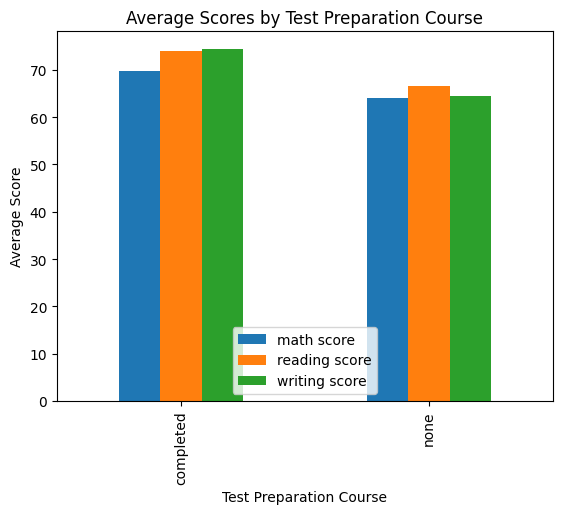

In [ ]:
testprep_avg.plot(kind="bar")

plt.title("Average Scores by Test Preparation Course")
plt.xlabel("Test Preparation Course")
plt.ylabel("Average Score")

plt.show()


Calculating Score Improvent

In [ ]:
difference = testprep_avg.loc["completed"] - testprep_avg.loc["none"]

print("Score Improvement (Completed - None)")
print(difference)


Score Improvement (Completed - None)
math score       5.617649
reading score    7.359587
writing score    9.914322
dtype: float64


Students who completed the test preparation course scored approximately 5–9 points higher across all subjects compared to those who did not. The strongest improvement is observed in writing, followed by reading and mathematics. This suggests that structured academic preparation has a meaningful and consistent impact on performance. Schools should strongly encourage participation in test preparation programs and consider expanding structured practice modules.

# **SECTION 5 — Socioeconomic Impact (Lunch Type)**

Step 1 — Compute Averages by Lunch

In [ ]:
lunch_avg = df.groupby("lunch")[["math score", "reading score", "writing score"]].mean()

print("AVERAGE SCORES BY LUNCH TYPE")
print("--------------------------------")
print(lunch_avg)


AVERAGE SCORES BY LUNCH TYPE
--------------------------------
              math score  reading score  writing score
lunch                                                 
free/reduced   58.921127      64.653521      63.022535
standard       70.034109      71.654264      70.823256


Step 2 — Plot

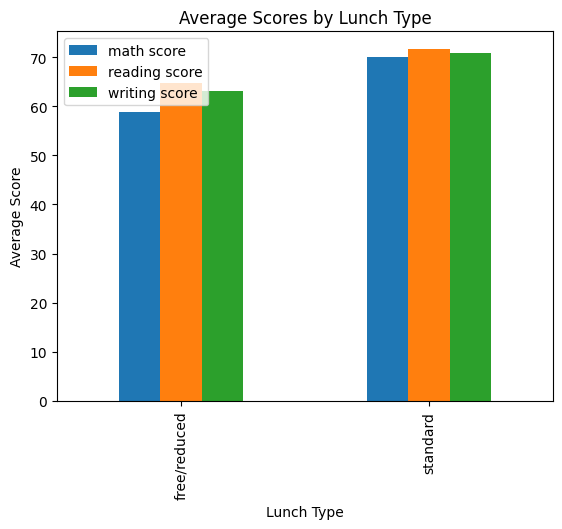

In [ ]:
lunch_avg.plot(kind="bar")

plt.title("Average Scores by Lunch Type")
plt.xlabel("Lunch Type")
plt.ylabel("Average Score")

plt.show()


Step 3 — Calculate Exact Differences

In [ ]:
lunch_difference = lunch_avg.loc["standard"] - lunch_avg.loc["free/reduced"]

print("Score Gap (Standard - Free/Reduced)")
print(lunch_difference)


Score Gap (Standard - Free/Reduced)
math score       11.112982
reading score     7.000742
writing score     7.800721
dtype: float64


Students with standard lunch programs outperform those receiving free or reduced lunch by approximately 7–11 points across all subjects. The performance gap is most pronounced in mathematics, indicating that socioeconomic factors may significantly influence academic achievement. The consistency of the gap across subjects suggests systemic performance differences rather than subject-specific weaknesses.

# **Section 6 — High Performer Segmentation**

**Finding High Performance Threshold**

In [ ]:
df["average score"] = (
    df["math score"] +
    df["reading score"] +
    df["writing score"]
) / 3
df["average score"].describe()


,average score
count,1000.000000
mean,67.770667
std,14.257326
min,9.000000
25%,58.333333
50%,68.333333
75%,77.666667
max,100.000000


75% of Students score below 77.67, so we define High Performers as students in the Top 25% (above the 75th percentile).

Step 1 — Define high performers:

In [ ]:
threshold = df["average score"].quantile(0.75)

df["high_performer"] = df["average score"] >= threshold


Step 2 — Check how many:

In [ ]:
df["high_performer"].value_counts()


,count
high_performer,
False,746
True,254


# **Section 7 — High Performer Profiling**



There are:

254 High Performers

746 Others

We now answer:

**What characteristics are more common among high performers?**

We will check:

1. Gender distribution

2. Test preparation distribution

3. Lunch distribution

4. Average score comparison

STEP 1 — Gender Distribution Among High Performers

In [ ]:
high_gender = df[df["high_performer"] == True]["gender"].value_counts(normalize=True)

print("Gender Distribution Among High Performers")
print(high_gender)


Gender Distribution Among High Performers
gender
female    0.586614
male      0.413386
Name: proportion, dtype: float64


Although females form a higher proportion of high performers (~59%), the gap is moderate, not extreme. This suggests gender plays a role, but it is not the dominant defining factor.

STEP 2 — Test Preparation Distribution

In [ ]:
high_testprep = df[df["high_performer"] == True]["test preparation course"].value_counts(normalize=True)

print("\nTest Preparation Distribution Among High Performers")
print(high_testprep)



Test Preparation Distribution Among High Performers
test preparation course
completed    0.503937
none         0.496063
Name: proportion, dtype: float64


Test preparation improves averages, but it is not a necessary condition for being a high performer.

STEP 3 — Lunch Distribution

In [ ]:
high_lunch = df[df["high_performer"] == True]["lunch"].value_counts(normalize=True)

print("\nLunch Distribution Among High Performers")
print(high_lunch)



Lunch Distribution Among High Performers
lunch
standard        0.791339
free/reduced    0.208661
Name: proportion, dtype: float64


Socioeconomic conditions appear more strongly associated with high performance than test preparation participation.

STEP 4 — Compare Average Scores

In [ ]:
performance_comparison = df.groupby("high_performer")[["math score", "reading score", "writing score"]].mean()

print("\nAverage Scores: High Performers vs Others")
print(performance_comparison)



Average Scores: High Performers vs Others
                math score  reading score  writing score
high_performer                                          
False            60.215818      63.264075      62.012064
True             83.338583      86.511811      85.799213


**The score gap between high performers and others is ~23 points across all subjects.**

Based on the profiling analysis, lunch type appears to have the strongest association with high academic performance, as nearly 80% of high-performing students receive standard lunch. Gender demonstrates a moderate association, with female students slightly more represented among top performers. Test preparation participation, while beneficial for improving average scores, does not strongly differentiate top-performing students, as participation is nearly evenly split.

# **Section 9 — Final Consolidated Insights**

1. Overall student performance is concentrated in the mid-to-high range, with most scores falling between 60 and 75. The distribution reflects moderate variation rather than extreme dispersion, indicating relatively stable overall academic performance across the dataset.

2. Gender-based analysis reveals subject-specific differences rather than overall dominance. Male students slightly outperform females in mathematics, while female students perform better in reading and writing. The performance gap is moderate and suggests targeted academic reinforcement may be more effective than generalized interventions.

3. Test preparation courses are associated with measurable improvements in academic performance. Students who completed the course scored approximately 5–9 points higher across all subjects. However, profiling of high-performing students shows that test preparation participation is nearly evenly distributed among the top 25 percent, indicating that while preparation improves averages, it does not solely define top-tier achievement.

4. Socioeconomic status, as represented by lunch type, shows the strongest association with academic performance. Students receiving standard lunch outperform those receiving free or reduced lunch by approximately 7–11 points across subjects. Furthermore, nearly 80 percent of high-performing students receive standard lunch, demonstrating a strong concentration of top-tier performance within this group.

5. The segmentation of students above the 75th percentile confirms a substantial and meaningful performance gap. High performers score approximately 23 points higher across subjects compared to other students, validating the effectiveness of the data-driven threshold.

6. When ranking performance drivers by strength of association with high achievement, lunch type emerges as the strongest factor, followed by gender as a moderate factor, and test preparation as the weakest differentiator of top-tier students. This distinction highlights the difference between factors that improve average performance and those strongly associated with elite academic outcomes.

# **Section 10 — Strategic Recommendations**

1. Implement targeted academic support programs addressing subject-specific performance gaps. Provide additional mathematics reinforcement for female students and structured reading and writing development programs for male students to address observed differences.

2. Expand and institutionalize structured test preparation initiatives. While preparation alone does not define high performers, it consistently improves academic averages and should be integrated more formally into the curriculum.

3. Develop institutional support strategies aimed at reducing socioeconomic disparities in academic performance. This may include additional tutoring resources, academic mentoring, and broader welfare or nutritional support programs to mitigate systemic performance gaps.

4. Monitor high-performing student characteristics periodically using data-driven segmentation methods. Regular percentile-based profiling can help identify shifts in performance drivers and inform targeted policy adjustments.